In [1]:
import numpy as np
import pandas as pd 
import sklearn.linear_model
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor

In [2]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]                              #to keep only the rows where 
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value") #
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    # print(full_country_stats.head())
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

In [3]:
bli=pd.read_csv("oecd_bli_2015.csv",thousands=',')
gdp=pd.read_csv("gdp_per_capita.csv",encoding='latin1',thousands=',',delimiter='\t',na_values='n/a')

In [4]:
country_stats=prepare_country_stats(bli,gdp)

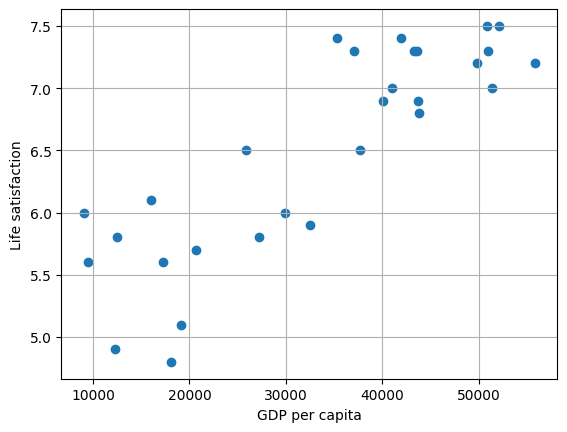

In [5]:
x=np.c_[country_stats['GDP per capita']]
y=np.c_[country_stats['Life satisfaction']]
plt.scatter(x,y)
plt.xlabel("GDP per capita")
plt.ylabel("Life satisfaction")
plt.grid(True)
plt.show()

In [6]:
model=sklearn.linear_model.LinearRegression()
model.fit(x,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [19]:
print(f"For Cyprus hapiness index is {model.predict([[22587]])[0][0]}")

For Cyprus hapiness index is 5.962423376619663


In [8]:
model2=KNeighborsRegressor(n_neighbors=3)
model2.fit(x,y)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [20]:
print(f"For Cyprus hapiness index is {model2.predict([[22587]])[0][0]}")

For Cyprus hapiness index is 5.766666666666666


In [23]:
# for india
print(f"For India hapiness index is {model2.predict([[12132]])[0][0]}")

For India hapiness index is 5.433333333333333
